[[ 0.62835793  4.4601363 ]
 [ 0.89011768  1.79849015]
 [ 3.19466821 -0.33716216]
 [ 3.2460247   2.84942165]
 [ 2.50904929  5.7731461 ]
 [ 1.74371499  0.953829  ]
 [-0.07228289  2.88376939]
 [ 1.54561534  0.45958936]
 [ 0.58894326  4.00148458]
 [ 1.28933778  3.44969159]
 [ 1.42013331  4.63746165]
 [ 2.47034915  4.09862906]
 [ 1.84070628  3.56162231]
 [ 1.24212124 -0.82861894]
 [ 1.54446238 -0.28296852]
 [ 2.78435808  1.02664657]
 [ 2.84382807  3.32650945]
 [ 2.52092996 -0.63858003]
 [ 1.9263585   4.15243012]
 [-0.73000011  6.25456272]
 [ 1.15980096  1.28456616]
 [ 2.45760916  0.21285357]
 [ 0.80247216  1.67515402]
 [ 2.20656076  5.50616718]
 [ 2.23269366  0.49588272]
 [ 1.42094543  0.53492249]
 [ 2.02708529  1.32599553]
 [ 0.42506917  1.36044592]
 [ 0.44136967  0.68492338]
 [ 1.38280707  0.5381105 ]
 [ 1.0220286   4.11660348]
 [ 1.1312175   4.68194985]
 [ 1.18447037  0.318814  ]
 [ 1.7373078   4.42546234]
 [ 1.14796916  0.94960906]
 [ 0.08848433  2.32299086]
 [ 1.12031365  5.75806083]
 

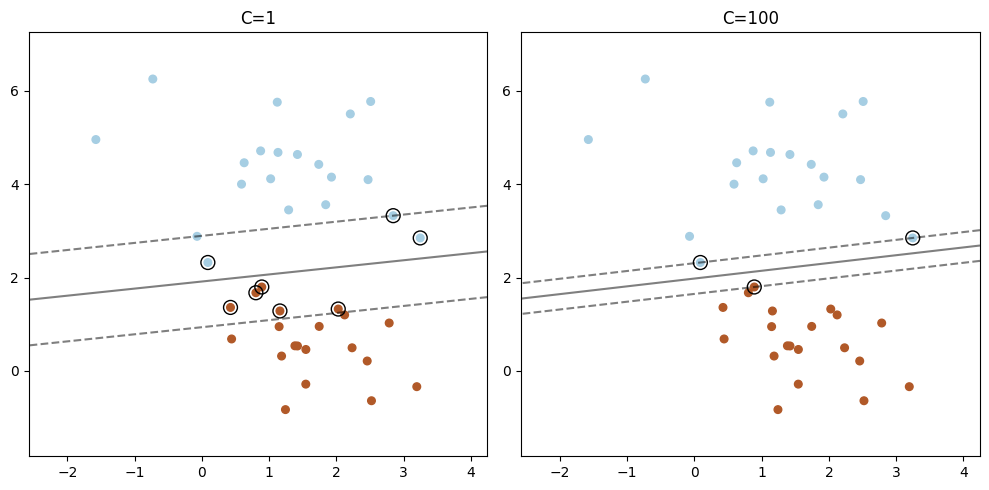

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import LinearSVC

X = [list(sample) for sample in zip(training_sample['NOx'], training_sample['SO2'])]
y = list(training_sample['Type'])
plt.figure(figsize=(10, 5))
for i, C in enumerate([1, 100]):
    # "hinge" is the standard SVM loss
    clf = LinearSVC(C=C, loss="hinge", random_state=42, dual="auto").fit(X, y)
    # obtain the support vectors through the decision function
    decision_function = clf.decision_function(X)
    # we can also calculate the decision function manually
    # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
    # The support vectors are the samples that lie within the margin
    # boundaries, whose size is conventionally constrained to 1
    support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
    print(support_vector_indices)
    support_vectors = X[support_vector_indices]

    plt.subplot(1, 2, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        ax=ax,
        grid_resolution=50,
        plot_method="contour",
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
    )
    plt.scatter(
        support_vectors[:, 0],
        support_vectors[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
    plt.title("C=" + str(C))
plt.tight_layout()
plt.show()

[[10, 50, 1], [20, 30, 1], [25, 30, 1], [20, 60, 1], [15, 70, 1], [40, 40, 1], [30, 45, 1], [20, 45, 1], [40, 30, 1], [7, 35, 1]]
[ 0.24371849 -0.13071259  0.01218592]
[[20. 45.  1.]
 [20. 30.  1.]
 [30. 45.  1.]]


C:\Users\Mark\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


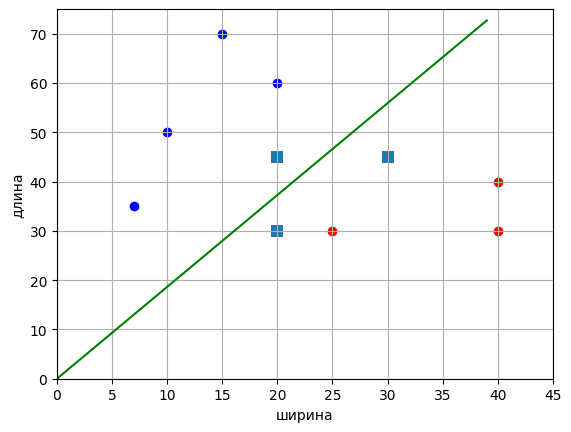

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm


# обучающая выборка с тремя признаками (третий - константа +1)
x_train = [[10, 50], [20, 30], [25, 30], [20, 60], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]]
x_train = [x + [1] for x in x_train]
y_train = [-1, 1, 1, -1, -1, 1, 1, -1, 1, -1]
print(x_train)

clf = svm.SVC(kernel='linear')      # SVM с линейным ядром
clf.fit(x_train, y_train)           # нахождение вектора w по обучающей выборке

lin_clf = svm.LinearSVC()           # SVM для линейно разделимой выборки (используется для получения вектора w)
lin_clf.fit(x_train, y_train)       # нахождение вектора w по обучающей выборке

v = clf.support_vectors_            # выделение опорных векторов
w = lin_clf.coef_[0]                # коэффициенты линейной модели
print(w, v, sep='\n')


# формирование графиков для визуализации полученных результатов
x_train = np.array(x_train)
y_train = np.array(y_train)
line_x = list(range(max(x_train[:, 0])))    # формирование графика разделяющей линии
line_y = [-x*w[0]/w[1] - w[2] for x in line_x]

x_0 = x_train[y_train == 1]                 # формирование точек для 1-го
x_1 = x_train[y_train == -1]                # и 2-го классов

plt.scatter(x_0[:, 0], x_0[:, 1], color='red')
plt.scatter(x_1[:, 0], x_1[:, 1], color='blue')
plt.scatter(v[:, 0], v[:, 1], s=70, edgecolor=None, linewidths=0, marker='s')
plt.plot(line_x, line_y, color='green')

plt.xlim([0, 45])
plt.ylim([0, 75])
plt.ylabel("длина")
plt.xlabel("ширина")
plt.grid(True)
plt.show()